# Contents:

    1.) 

# 1.) Importing Libraries & Files

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create Path
path = r'C:\Users\dmlos\Instacart Basket Analysis'

In [4]:
#Import the Dataframe of merged Customer and Spending Data
merged_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merged_customer_frequency_spending_2.pkl'))

In [5]:
#Import the Departments Dataframe
departments_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Wrangled Data', 'departments_wrangled.csv'), index_col = False)

# 2.) Address Data Sensitivity Concerns


In [7]:
#Look at the columns of the merged_df dataframe
merged_df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,First Name,Surname,Gender,State,Age,Date_Joined,Number_Dependants,Family_Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [8]:
#Look at the data types within the merged_df dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   product_id                        int32  
 1   product_name                      object 
 2   aisle_id                          int64  
 3   department_id                     int64  
 4   prices                            float64
 5   order_id                          int32  
 6   user_id                           int64  
 7   order_number                      int64  
 8   orders_day_of_week                int64  
 9   order_hour_of_day                 int64  
 10  days_since_prior_order            float64
 11  add_to_cart_order                 int32  
 12  reordered                         int8   
 13  busiest_day                       object 
 14  busiest_days                      object 
 15  busiest_hours                     object 
 16  busiest_periods                   

In [9]:
#Dropping Personally-Identifying Information
merged_df = merged_df.drop(columns = ['First Name', 'Surname'])

In [10]:
#Checking the new dataframe with the removed columns
merged_df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median_days_since_prior_order,frequency_flag,Gender,State,Age,Date_Joined,Number_Dependants,Family_Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [12]:
#Change the data types of various different columns to conserve memory usage

merged_df['orders_day_of_week']=merged_df['orders_day_of_week'].astype('int8')
merged_df['Income']=merged_df['Income'].astype('int32')
merged_df['days_since_prior_order']=merged_df['days_since_prior_order'].astype('float16')
merged_df['user_id']=merged_df['user_id'].astype('int32')
merged_df['Age']=merged_df['Age'].astype('int8')
merged_df['average_customer_price_per_order']=merged_df['average_customer_price_per_order'].astype('float16')
merged_df['add_to_cart_order']=merged_df['add_to_cart_order'].astype('float16')
merged_df['max_order']=merged_df['max_order'].astype('int8')
merged_df['department_id']=merged_df['department_id'].astype('int8')
merged_df['prices']=merged_df['prices'].astype('float16')
merged_df['median_days_since_prior_order']=merged_df['median_days_since_prior_order'].astype('float16')
merged_df['product_id']=merged_df['product_id'].astype('float16')
merged_df['Number_Dependants']=merged_df['Number_Dependants'].astype('int8')
merged_df['max_order']=merged_df['max_order'].astype('int8')
merged_df['product_id']=merged_df['product_id'].astype('float16') 
merged_df['aisle_id']=merged_df['aisle_id'].astype('int8') 

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   product_id                        float16
 1   product_name                      object 
 2   aisle_id                          int8   
 3   department_id                     int8   
 4   prices                            float16
 5   order_id                          int32  
 6   user_id                           int32  
 7   order_number                      int64  
 8   orders_day_of_week                int8   
 9   order_hour_of_day                 int64  
 10  days_since_prior_order            float16
 11  add_to_cart_order                 float16
 12  reordered                         int8   
 13  busiest_day                       object 
 14  busiest_days                      object 
 15  busiest_hours                     object 
 16  busiest_periods                   

# 3.) Create a Column for Regions Based on the State Column

In [14]:
#Check the current state column
merged_df['State'].value_counts(dropna = False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [15]:
#Defining the regions

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
#Assign the new region labels to a new column, "region"

merged_df.loc[merged_df['State'].isin(region_1_NE), 'region'] = 'Northeast'
merged_df.loc[merged_df['State'].isin(region_2_MW), 'region'] = 'Midwest'
merged_df.loc[merged_df['State'].isin(region_3_S), 'region'] = 'South'
merged_df.loc[merged_df['State'].isin(region_4_W), 'region'] = 'West'

In [17]:
#Check the newly-created region column

merged_df['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [18]:
#Compare the differences in spending between US regions using a Crosstab

crosstab_regions = pd.crosstab(merged_df['spending_flag'], merged_df['region'], dropna = False)

In [19]:
#Spending Habits Crosstab by Region of the US
crosstab_regions

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156129,108343,210182,160807
Low spender,7447681,5620004,10591428,8139638


# 4.) Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [20]:
#Define an activity flag based on the number of orders

merged_df.loc[merged_df['max_order'] <5, 'activity_flag'] = 'Low activity'
merged_df.loc[merged_df['max_order'] >=5, 'activity_flag'] = 'High activity'

In [21]:
#Check the dataframe with the newly-formed activty_flag
merged_df.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,Gender,State,Age,Date_Joined,Number_Dependants,Family_Status,Income,region,activity_flag
0,1.0,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1.0,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907.0,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907.0,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000.0,Apricots,18,10,12.898438,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


In [22]:
#Check the newly-added column

merged_df['activity_flag'].value_counts(dropna = False)

High activity    30992664
Low activity      1441548
Name: activity_flag, dtype: int64

In [23]:
#Exclude the high-activity flagged customers

low_activity_customers = merged_df[merged_df['activity_flag'] == 'Low activity']
low_activity_customers.head() 

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,Gender,State,Age,Date_Joined,Number_Dependants,Family_Status,Income,region,activity_flag
340,1.0,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low activity
341,1.0,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low activity
342,3260.0,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.700195,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low activity
343,3260.0,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.700195,705212,764,2,2,10,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low activity
344,3260.0,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.700195,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low activity


In [25]:
#Export the new, low-activity subset to a .pkl format

low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [61]:
#Exclude the low-activity flagged customers

high_activity_customers = merged_df[merged_df['activity_flag'] == 'High activity']
high_activity_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,Gender,State,Age,Date_Joined,Number_Dependants,Family_Status,Income,region,activity_flag
0,1.0,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1.0,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907.0,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907.0,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000.0,Apricots,18,10,12.898438,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


In [62]:
#Export the new, high-activity subset to a .pkl format
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

# 5.) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [83]:
#Begin by profiling high-activity customers

top_cstmrs = high_activity_customers

In [84]:
#Profile the age of high-activity customers using descriptive statistics from the "age" column

top_cstmrs['Age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

We can see from the spread of ages among high-activity customers that the youngest is 18 years and the oldest is 81 years.

Based on the spread of our ages, the age groups we employ will be:

    1) Young (18-33)
    2) Middle Age (40-64)
    3) Seniors (65+)

In [65]:
#Segment the top customers (top_cstmrs) based on age

top_cstmrs.loc[(top_cstmrs['Age'] >= 18) & (top_cstmrs['Age'] < 40), 'age_category'] = 'Youth'
top_cstmrs.loc[(top_cstmrs['Age'] >= 40) & (top_cstmrs['Age'] < 65), 'age_category'] = 'Middle age'
top_cstmrs.loc[top_cstmrs['Age'] >= 65, 'age_category'] = 'Senior'
top_cstmrs['age_category'].value_counts()

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\2718474495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[(top_cstmrs['Age'] >= 18) & (top_cstmrs['Age'] < 40), 'age_category'] = 'Youth'


Middle age    12115268
Youth         10674650
Senior         8202746
Name: age_category, dtype: int64

In [66]:
#Check the new top_cstmrs dataframe to see the new column

top_cstmrs.shape

(30992664, 33)

In [67]:
#Segment the top customers (top_cstmrs) based on number of dependents

top_cstmrs['Number_Dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_Dependants, dtype: float64

Family Size groups based on the results from above.
       
        a) Small Family = 0 Dependents
        
        b) Mid-Size Family = 1-2 Dependents
        
        c) Large Family > 2 Dependents

In [68]:
#Creating family_size column

top_cstmrs.loc[top_cstmrs['Number_Dependants'] == 0, 'family_size'] = 'Small'
top_cstmrs.loc[(top_cstmrs['Number_Dependants'] == 1) & (top_cstmrs['Number_Dependants'] == 2), 'family_size'] = 'Mid Size'
top_cstmrs.loc[top_cstmrs['Number_Dependants'] > 2, 'family_size'] = 'Large'

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\3872752672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[top_cstmrs['Number_Dependants'] == 0, 'family_size'] = 'Small'


In [69]:
#Checking the new column
top_cstmrs['family_size'].value_counts(dropna = False)

NaN      15466180
Large     7779452
Small     7747032
Name: family_size, dtype: int64

In [136]:
#Use a crosstab to explore the relationship between marital status and number of dependents among your top customers

family_crosstab= pd.crosstab(top_cstmrs['Family_Status'], top_cstmrs['Number_Dependants'], dropna = False)

In [137]:
family_crosstab

Number_Dependants,0,1,2,3
Family_Status,,,,
divorced/widowed,2647761,0,0,0
living with parents and siblings,0,508439,485157,489015
married,0,7217542,7255042,7290437
single,5099271,0,0,0


In [138]:
#Organize the number of dependents-marital status information into respective categories

top_cstmrs.loc[(top_cstmrs['Family_Status'] == 'married') & (top_cstmrs['Number_Dependants'] == 1), 'household'] = 'Couple without children'
top_cstmrs.loc[(top_cstmrs['Family_Status'] == 'married') & (top_cstmrs['Number_Dependants'] >= 2), 'household'] = 'Couple with children'
top_cstmrs.loc[(top_cstmrs['Family_Status'] == 'divorced/widowed') | (top_cstmrs['Family_Status'] == 'single') , 'household'] = 'Single person'
top_cstmrs.loc[(top_cstmrs['Family_Status'] == 'divorced/widowed') & (top_cstmrs['Number_Dependants'] > 0) , 'household'] = 'Single parent'
top_cstmrs.loc[top_cstmrs['Family_Status'] == 'living with parents and siblings', 'household'] = 'Other Arrangement'

In [139]:
#Checking the new columns

top_cstmrs['household'].value_counts(dropna = False)

Couple with children       14545479
Single person               7747032
Couple without children     7217542
Other Arrangement           1482611
Name: household, dtype: int64

In [140]:
#Segment the top customers(top_cstmrs) based on income

top_cstmrs['Income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: Income, dtype: float64

In [141]:
#Creating an income_category column

top_cstmrs.loc[top_cstmrs['Income']< 67289 , 'income_category'] = 'Low'
top_cstmrs.loc[(top_cstmrs['Income']>= 67289) & (top_cstmrs['Income']< 96765), 'income_category'] = 'Middle'
top_cstmrs.loc[(top_cstmrs['Income']>= 96765) & (top_cstmrs['Income']< 128100), 'income_category'] = 'Upper mid'
top_cstmrs.loc[top_cstmrs['Income']>= 128100, 'income_category'] = 'High'

In [142]:
#Checking the new column
top_cstmrs['income_category'].value_counts(dropna = False)

Middle       7748589
High         7748534
Upper mid    7748085
Low          7747456
Name: income_category, dtype: int64

In [143]:
#Segment by department

departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [144]:
#Renaming index column to a more logical name

departments_df.rename(columns= {'Unnamed: 0': 'department_id'}, inplace = True)

In [145]:
#Use only the department_id and department columns to create a data dictionary

departments_data_dict=dict(zip(departments_df["department_id"], departments_df["department"]))

In [79]:
departments_data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [80]:
#Create a new column in top_cstmrs called "department" that matches the department_id of the customers to the department names using the map function.

top_cstmrs['department'] = top_cstmrs['department_id'].map(departments_data_dict)

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\1686762919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs['department'] = top_cstmrs['department_id'].map(departments_data_dict)


In [81]:
#Check the new column in the dataframe

top_cstmrs.shape

(30992664, 37)

In [82]:
#Distribution of the the department values within the top_cstmrs dataframe

top_cstmrs['department'].value_counts(dropna = False)

produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [85]:
#Creating a foreign_born_shopper column

top_cstmrs.loc[top_cstmrs['department'] !='international', 'foreign_born_shopper'] = 'No'
top_cstmrs.loc[top_cstmrs['department'] =='international', 'foreign_born_shopper'] = 'Yes'

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\2038883522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[top_cstmrs['department'] !='international', 'foreign_born_shopper'] = 'No'


In [86]:
#Check the breakdown of foreign-born and native-born shoppers
top_cstmrs['foreign_born_shopper'].value_counts(dropna = False)

No     30736673
Yes      255991
Name: foreign_born_shopper, dtype: int64

In [87]:
#Confirm the addition of the new column in the dataframe

top_cstmrs.shape

(30992664, 38)

In [88]:
#Creating a families with babies column

top_cstmrs.loc[top_cstmrs['department'] !='babies', 'family_with_baby'] = 'No'
top_cstmrs.loc[top_cstmrs['department'] =='babies', 'family_with_baby'] = 'Yes'

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\2134119639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[top_cstmrs['department'] !='babies', 'family_with_baby'] = 'No'


In [89]:
#Check the breakdown of foreign-born and native-born shoppers
top_cstmrs['family_with_baby'].value_counts(dropna = False)

No     30582272
Yes      410392
Name: family_with_baby, dtype: int64

In [90]:
#Confirm the addition of the new column in the dataframe

top_cstmrs.shape

(30992664, 39)

In [92]:
#Creating a families with pets column

top_cstmrs.loc[top_cstmrs['department'] !='pets', 'family_with_pet'] = 'No'
top_cstmrs.loc[top_cstmrs['department'] =='pets', 'family_with_pet'] = 'Yes'

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\2414007233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[top_cstmrs['department'] !='pets', 'family_with_pet'] = 'No'


In [93]:
#Check the breakdown of families with and without pets among top-customers

top_cstmrs['family_with_pet'].value_counts(dropna= False)

No     30899599
Yes       93065
Name: family_with_pet, dtype: int64

In [94]:
#Confirm the addition of the new column in the dataframe

top_cstmrs.shape

(30992664, 40)

In [99]:
#Create a column for periodic shoppers
top_cstmrs.loc[top_cstmrs['orders_day_of_week'] >= 6, 'Periodic Shopper'] = 'Weekend'
top_cstmrs.loc[top_cstmrs['orders_day_of_week'] < 6, 'Periodic Shopper'] = 'Weekday'

In [100]:
#Check the breakout of weekday vs weekend shoppers
top_cstmrs['Periodic Shopper'].value_counts(dropna = False)

Weekday    26697764
Weekend     4294900
Name: Periodic Shopper, dtype: int64

In [91]:
# Uncovering male vs female shoppers within our top customers
top_cstmrs['Gender'].value_counts(dropna= False)

Male      15600678
Female    15391986
Name: Gender, dtype: int64

In [101]:
#Look at distribution of orders by hour of day amongst our top customers
top_cstmrs['order_hour_of_day'].value_counts(dropna = False)

10    2652281
11    2617231
14    2570222
13    2541503
15    2538243
12    2497952
16    2415842
9     2365985
17    1984054
8     1660870
18    1552536
19    1194898
20     931727
7      864060
21     763806
22     607549
23     384830
6      281282
0      208208
1      109704
5       84508
2       65740
4       50802
3       48831
Name: order_hour_of_day, dtype: int64

In [102]:
#Creating a 'Purchase_Period' column for early morning, late morning, afternoon&evening, and late-night shoppers

top_cstmrs.loc[(top_cstmrs['order_hour_of_day'] >= 0) & (top_cstmrs['order_hour_of_day'] <= 5), 'Purchase_Period'] = 'Early Morning'
top_cstmrs.loc[(top_cstmrs['order_hour_of_day'] >= 6) & (top_cstmrs['order_hour_of_day'] <= 11), 'Purchase_Period'] = 'Late Morning'
top_cstmrs.loc[(top_cstmrs['order_hour_of_day'] >= 12) & (top_cstmrs['order_hour_of_day'] <= 17), 'Purchase_Period'] = 'Afternoon'
top_cstmrs.loc[(top_cstmrs['order_hour_of_day'] >= 18) & (top_cstmrs['order_hour_of_day'] <= 23), 'Purchase_Period'] = 'Evening/Night'

C:\Users\dmlos\AppData\Local\Temp\ipykernel_6716\2024915269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cstmrs.loc[(top_cstmrs['order_hour_of_day'] >= 0) & (top_cstmrs['order_hour_of_day'] <= 5), 'Purchase_Period'] = 'Early Morning'


In [103]:
#Check the breakout of popular purchase time periods among our top customers
top_cstmrs['Purchase_Period'].value_counts(dropna = False)

Afternoon        14547816
Late Morning     10441709
Evening/Night     5435346
Early Morning      567793
Name: Purchase_Period, dtype: int64

In [ ]:
#Create pie chart displaying the distribution of pet-owners and non-owners

In [ ]:
pet_owner_pie = top_cstmrs[''].value_counts().plot.pie(labels = ['' , ''], autopct = (), colors = ['', ''], label = '', explode = [0, 0.2])
pet_owner_pie.legend(title = 'Purchase Period: ', loc = 'upper left')
plt.title( "Purchase Period", fontsize= '18')

Text(0.5, 1.0, 'Purchase Period')

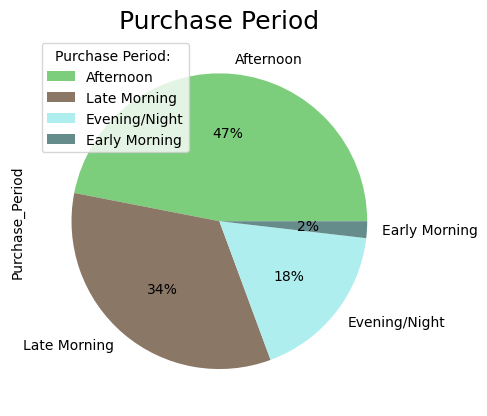

In [114]:
#Create pie chart displaying the distribution of shoppers by time period of day

purchase_period_pie = top_cstmrs['Purchase_Period'].value_counts().plot.pie(labels = ['Afternoon','Late Morning','Evening/Night', 'Early Morning'], autopct=('%1.f%%'), colors = ['#7CCD7C','#8B7765', '#AEEEEE', '#668B8B'])
purchase_period_pie.legend(title = 'Purchase Period: ', loc = 'upper left')
plt.title( "Purchase Period", fontsize= '18')

Text(0.5, 0, 'Order Periods')

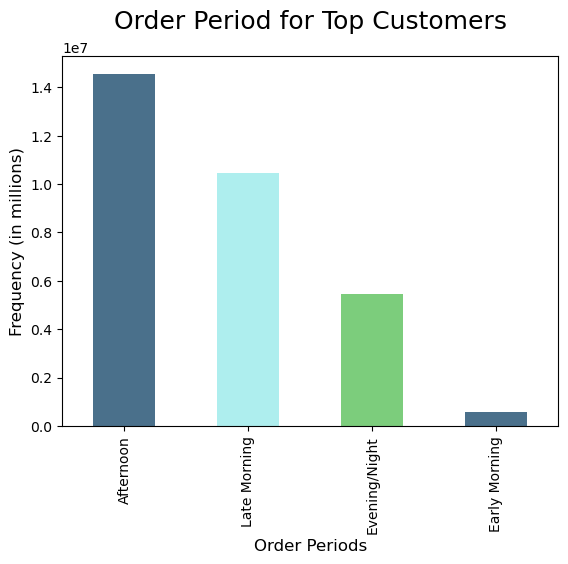

In [119]:
#Create a bar chart displaying the distribution of customers by order period

order_period_bar = top_cstmrs['Purchase_Period'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C'])
plt.title('Order Period for Top Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Periods',  fontsize = 12)


Text(0.5, 1.0, 'Families With Babies')

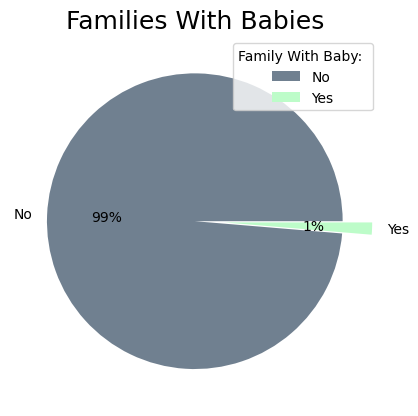

In [148]:
#Create pie chart displaying the distribution of families with babies and families without babies

child_status_pie = top_cstmrs['family_with_baby'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['#708090','#BDFCC9'], label = '', explode = [0,0.2])
child_status_pie.legend(title = 'Family With Baby: ', loc = 'upper right')
plt.title( "Families With Babies", fontsize= '18')

Text(0.5, 0, 'Income Brackets')

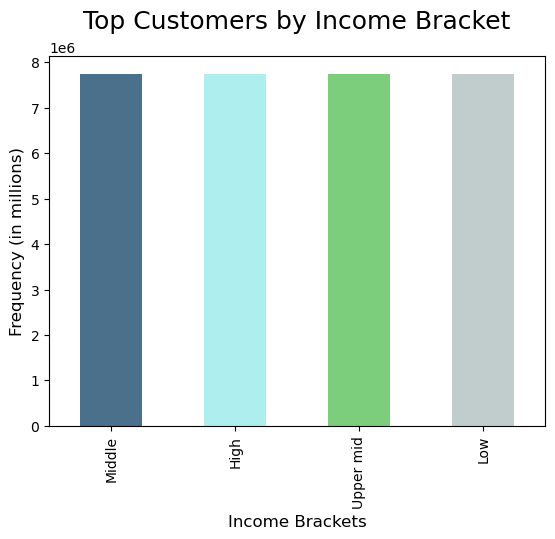

In [121]:
#Create a bar chart displaying the distribution of households by income bracket
income_bracket_bar = top_cstmrs['income_category'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C', '#C1CDCD'])
plt.title('Top Customers by Income Bracket', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Brackets',  fontsize = 12)


In [123]:
#Create a crosstab of customers by income bracket in different regions

crosstab_income_region = pd.crosstab (top_cstmrs['region'], top_cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle,Upper mid
region,,,,
Midwest,1843691,1792029,1779599,1852388
Northeast,1374284,1368199,1357293,1370292
South,2551358,2595307,2642074,2531723
West,1979201,1991921,1969623,1993682


Text(0.5, 0, 'Region')

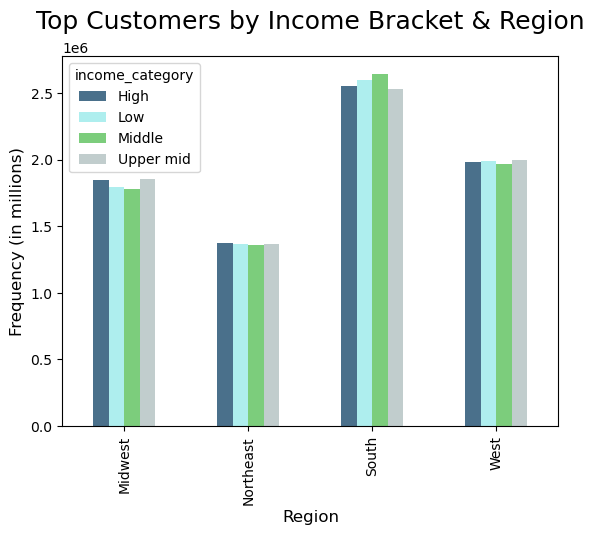

In [131]:
#Create a bar chart displaying the distribution of customers by income bracket and region
income_bracket_bar = crosstab_income_region.plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C', '#C1CDCD'])
plt.title('Top Customers by Income Bracket & Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


Text(0.5, 0, 'Family Structure')

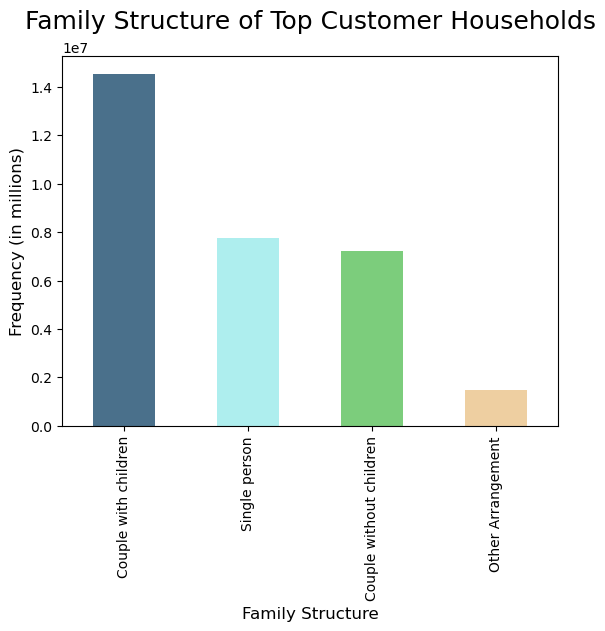

In [147]:
#Create a bar chart displaying the distribution of customers by family situation
family_structure_bar = top_cstmrs['household'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C', '#EECFA1'])
plt.title('Family Structure of Top Customer Households', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Family Structure',  fontsize = 12)

Text(0.5, 1.0, 'Pet Owner Status')

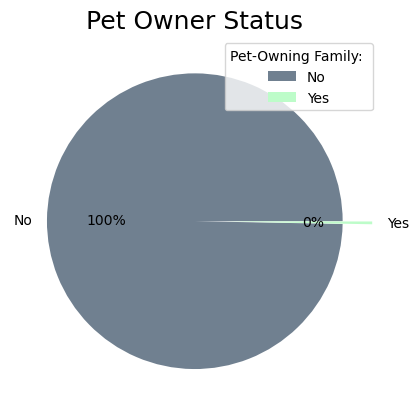

In [116]:
#Create a pie chart displaying the distribution of pet-owners among our top customers

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['#7CCD7C', '#8B7765', '#AEEEEE', '#668B8B'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category Distribution in Each Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

Text(0.5, 1.0, 'Shopper Origin')

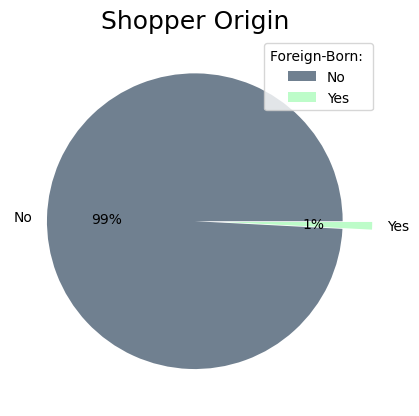

In [106]:
#Create a pie chart displaying the distribution of foreign_born to non-foreign shoppers among our top customers

foreign_born_pie = top_cstmrs['foreign_born_shopper'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['#708090','#BDFCC9'], label = '', explode = [0,0.2])
foreign_born_pie.legend(title = 'Foreign-Born: ', loc = 'upper right')
plt.title( "Shopper Origin", fontsize= '18')

Text(0.5, 1.0, 'Top Customers by Gender')

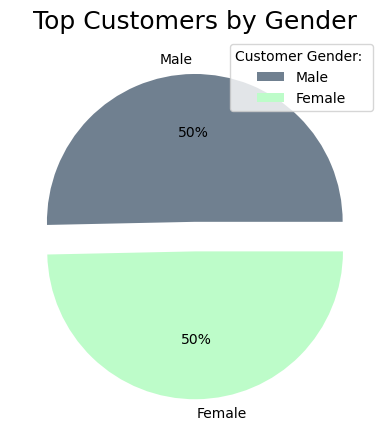

In [105]:
#Create a pie chart displaying the distribution of gender among our top customers

shopper_gender_pie = top_cstmrs['Gender'].value_counts().plot.pie(labels = ['Male','Female'], autopct=('%1.f%%'), colors = ['#708090','#BDFCC9'], label = '', explode = [0,0.2])
shopper_gender_pie.legend(title = 'Customer Gender: ', loc = 'upper right')
plt.title( "Top Customers by Gender", fontsize= '18')

In [149]:
#Department Expenditures Aggregation

top_cstmrs.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices                     
                      mean       min        max
department                                     
alcohol           8.148438  1.000000  15.000000
babies            7.632812  1.000000  15.000000
bakery            7.867188  1.000000  15.000000
beverages         7.683594  1.000000  15.000000
breakfast         8.070312  1.000000  14.898438
bulk              8.343750  1.400391  14.101562
canned goods      7.546875  1.000000  15.000000
dairy eggs             NaN  1.000000        inf
deli              7.781250  1.000000  15.000000
dry goods pasta   7.347656  1.000000  15.000000
frozen            7.738281  1.000000  15.000000
household         7.378906  1.000000  15.000000
international     7.679688  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.960938  1.099609  15.000000
pantry            8.015625  1.000000  20.000000
personal care     8.000000  1.000000  15.000000
pets              7.886719  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [150]:
#Aggregate usage frequency figures by age category

top_cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                          mean  min    max
age_category                              
Middle age            8.351562  1.0  145.0
Senior                8.304688  1.0   99.0
Youth                 8.414062  1.0  109.0

In [151]:
#Aggregate usage frequency figures by region

top_cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.351562  1.0  109.0
Northeast          8.375000  1.0  145.0
South              8.367188  1.0  137.0
West               8.359375  1.0  114.0

In [156]:
#Department Expenditures Aggregation by Income Bracket
top_cstmrs.groupby('income_category').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
income_category                        
High                  NaN  1.0      inf
Low              7.316406  1.0  14896.0
Middle                NaN  1.0      inf
Upper mid             NaN  1.0      inf

In [154]:
#Aggregate expenditures figures by region
top_cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices          
            mean  min  max
region                    
Midwest      NaN  1.0  inf
Northeast    NaN  1.0  inf
South        NaN  1.0  inf
West         NaN  1.0  inf

In [155]:
#Aggregate usage frequency figures by household type
top_cstmrs.groupby('household').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                                     mean  min    max
household                                            
Couple with children             8.367188  1.0  145.0
Couple without children          8.375000  1.0  114.0
Other Arrangement                8.375000  1.0  102.0
Single person                    8.335938  1.0  137.0

In [157]:
#Department Expenditures Aggregation by Period Of Purchase
top_cstmrs.groupby('Purchase_Period').agg({'prices': ['mean', 'min', 'max']})

prices          
                  mean  min  max
Purchase_Period                 
Afternoon          NaN  1.0  inf
Early Morning      NaN  1.0  inf
Evening/Night      NaN  1.0  inf
Late Morning       NaN  1.0  inf

In [159]:
# Investigating the connection of age categories and the day of drders

crosstab_age_day = pd.crosstab(top_cstmrs['age_category'], top_cstmrs['Periodic Shopper'], dropna = False)

Text(0.5, 0, 'Age Category')

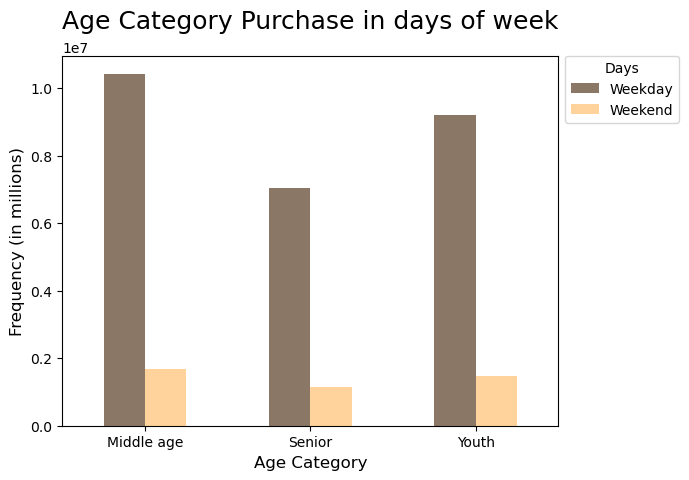

In [161]:
# Create bar chart of orders by day and age group of customer

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['#8B7765', '#FFD39B', '#AEEEEE', '#668B8B', '#7CCD7C','#BCEE68', '#698B22'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Weekday', 'Weekend'])
plt.title('Age Category Purchase in days of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

# Exporting Charts

In [162]:
# Exporting purchase period pie chart in .png format

purchase_period_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'purchase_period_pie.png'), bbox_inches='tight')

In [163]:
# Exporting order frequency by age cohort bar chart in .png format

bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_day.png'), bbox_inches='tight')

In [164]:
# Exporting shopper_gender distribution pie chart in .png format

shopper_gender_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_gender_pie.png'), bbox_inches='tight')

In [165]:
# Exporting foreign_born shoppers distribution pie chart in .png format

foreign_born_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'foreign_born_pie.png'), bbox_inches='tight')

In [166]:
# Exporting family_strucutre bar chart in .png format

family_structure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_structure_bar.png'), bbox_inches='tight')

In [167]:
# Exporting customers by income bracket bar chart in .png format

income_bracket_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bracket_bar.png'), bbox_inches='tight')

In [168]:
# Exporting customer families by presence of babies pie chart in .png format

child_status_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'child_status_pie.png'), bbox_inches='tight')

In [169]:
# Exporting customer families by presence of babies pie chart in .png format

child_status_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'child_status_pie.png'), bbox_inches='tight')

In [170]:
# Exporting customer families by presence of pets pie chart in .png format

pet_owner_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_pie.png'), bbox_inches='tight')